# Základní oblasti strojového učení

## Učení se supervizí (supervised learning)

"Supervize" znamená, že dané metodě poskytnete trénovací datovou sadu se "správnými odpověďmi". Metoda se je naučí zobecnit, aby byla následně schopna je aplikovat na nová data.

- **lineární regrese** - lineární model, tj. hledá přímku (či rovinu, respektive nadrovinu), která datům nejlépe odpovídá
- **klasifikace** - data patří do několika kategorií, model se snaží na nových datech rozpoznat správnou kategorii
  - nejčastější ML úkol
  - logistická regrese, neuronové sítě a další metody
  
## Učení bez supervize (unsupervised learning)

K datům neexistují "správné odpovědi". Metoda se například snaží sdružit body do skupin dle jejich podobnosti (klustrování).

## Reinforcement Learning

Metoda se učí postupně na základě průběžné zkušenosti. Zvláštní kategorie, která nemá obdobu v jednoduchých statistických příkladech.

![Three types of Machine Learning](img/three-types-ML.jpg)

# Úvodní ML příklady

Častěji mohou být považované za statistické příklady. Hranice mezi statistikou a strojovým učením je velice neostrá a později uvidíte, že pokročilé techniky jako třeba neuronové sítě se v mnohém těmto základním příkladům podobají.


In [1]:
# import of common python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# set size to plots to 12, 6
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 16
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.cluster import SpectralClustering

## I. Počet nohou

In [2]:
df = pd.read_csv('data/I_pocet_nohou.csv')

In [3]:
df

,osoby,nohy
0,3,6
1,5,10
2,1,2
3,6,12


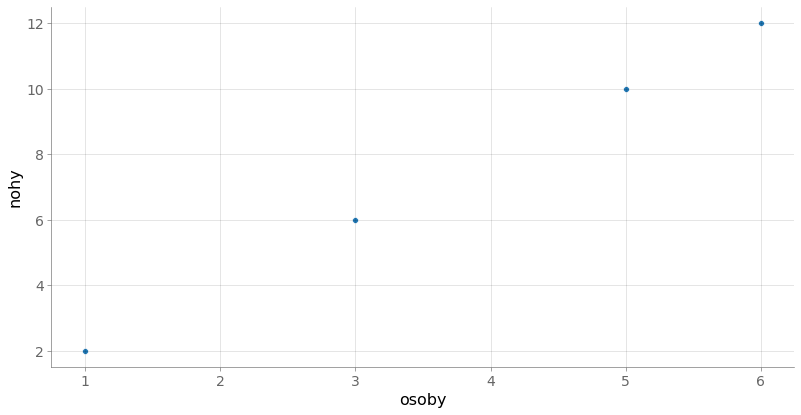

In [4]:
sns.scatterplot('osoby', 'nohy', data=df)

**Lineární regrese**
- hledáme přímku (lineární model), která datům nejlépe odpovídá.
- v tomto případě lze takovou přímku snadno uhodnout: nohy = 2 * osoby
- není potřeba nic počítat, ačkoli si následně můžeme potvrdit, že lineární regrese nám dá stejný výsledek

In [ ]:
sns.lineplot('osoby', 'nohy', data=df, marker='o')

In [5]:
model = smf.ols(formula='nohy ~ osoby', data=df).fit()
print(f'Regresní model: nohy = {model.params.Intercept:.3f} + {model.params.osoby:.3f} * osoby')

Regresní model: nohy = -0.000 + 2.000 * osoby


In [ ]:
model.summary()

## II. Cena nemovitostí

In [6]:
df = pd.read_csv('data/II_cena_nemovitosti.csv')

In [7]:
df

,rozloha,cena
0,20,1400
1,50,2400
2,40,1600
3,120,5000
4,60,2000
5,130,5600


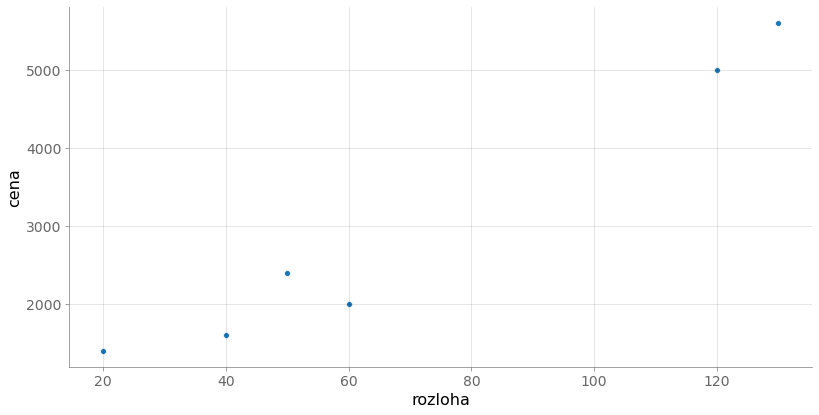

In [8]:
sns.scatterplot('rozloha', 'cena', data=df)

In [9]:
def abline(slope, intercept, ax=None):
    """Plot a line from slope and intercept"""
    axes = ax or plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    axes.plot(x_vals, y_vals, '--')

In [10]:
model = smf.ols(formula='cena ~ rozloha', data=df).fit()
print(f'Regresní model: cena = {model.params.Intercept:.1f} + {model.params.rozloha:.1f} * rozloha')

Regresní model: cena = 200.0 + 40.0 * rozloha


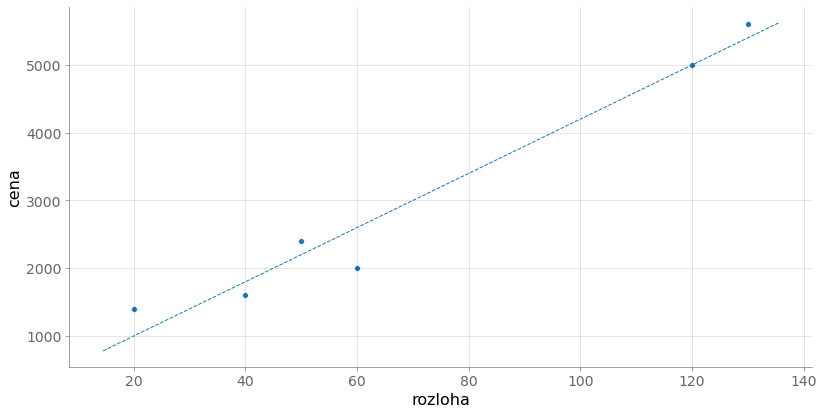

In [11]:
sns.scatterplot('rozloha', 'cena', data=df)
abline(model.params.rozloha, model.params.Intercept)

## III. Rychlé občerstvení

In [12]:
df = pd.read_csv('data/III_rychle_obcerstveni.csv')

In [13]:
df

,kofola,hranolky,hamburger,cena
0,1,0,2,110
1,2,3,1,160
2,4,2,2,240
3,2,10,0,260
4,2,2,2,180
5,3,1,3,230
6,4,4,0,200


Více proměnných, model však neobsahuje žádnou chybu - proto lze přesné ceny poměrně snadno uhodnout.

Lineární regrese vede také ke správnému výsledku.

In [16]:
model = smf.ols(formula='cena ~ kofola + hranolky + hamburger - 1', data=df).fit()
print(f'Regresní model: cena = {model.params.kofola:.1f} * kofola + ' \
      f'{model.params.hranolky:.1f} * hranolky + {model.params.hamburger:.1f} * hamburger')

Regresní model: cena = 30.0 * kofola + 20.0 * hranolky + 40.0 * hamburger


Modely lze používat jako black boxy, ale je užitečné mít představu, co se děje uvnitř. Pomůže to rozhodnout, kdy jaký model použít, a také odhalit, proč model nefunguje, jak bylo očekáváno.

Lineární regrese je ve skutečnosti relativně jednoduchá operace s maticemi a vektory (zde využíváme toho, že v modelu není konstantní člen - cena pro prázdnou objednávku je nulová; model s průsečíkem lze získat na základě mírně pozměněné matice).

In [17]:
X = df[['kofola', 'hranolky', 'hamburger']].values
y = df['cena'].values

In [18]:
X

array([[ 1,  0,  2],
       [ 2,  3,  1],
       [ 4,  2,  2],
       [ 2, 10,  0],
       [ 2,  2,  2],
       [ 3,  1,  3],
       [ 4,  4,  0]], dtype=int64)

In [19]:
y

array([110, 160, 240, 260, 180, 230, 200], dtype=int64)

In [20]:
coefs = np.linalg.inv(X.T @ X) @ X.T @ y
coefs

array([30., 20., 40.])

Matice a vektory lze také použít k výpočtu všech cen a k predikci - poskytují způsob, jak stručně zapsat relativně komplikované matematické operace.

In [21]:
df['pred_cena'] = df[['kofola', 'hranolky', 'hamburger']].values @ coefs

In [22]:
df

,kofola,hranolky,hamburger,cena,pred_cena
0,1,0,2,110,110.0
1,2,3,1,160,160.0
2,4,2,2,240,240.0
3,2,10,0,260,260.0
4,2,2,2,180,180.0
5,3,1,3,230,230.0
6,4,4,0,200,200.0


In [23]:
coefs

array([30., 20., 40.])

In [24]:
# Kolik stojí samotné hranolky? (Toto lze samozřejmě rovnou vidět z odhadnutých koeficientů.)
[0, 1, 0] @ coefs

20.000000000000007

In [25]:
# Kolik stojí 1 kofola a 5 hamburgerů?
[1, 0, 5] @ coefs

230.0000000000001

## IV. Rakovina

In [26]:
df = pd.read_csv('data/IV_rakovina.csv')

In [27]:
df

,velikost,typ
0,8,nezhoubný
1,10,nezhoubný
2,14,nezhoubný
3,16,zhoubný
4,20,nezhoubný
5,21,zhoubný
6,24,nezhoubný
7,28,zhoubný
8,30,zhoubný
9,36,zhoubný


[(-0.5, 1.5)]

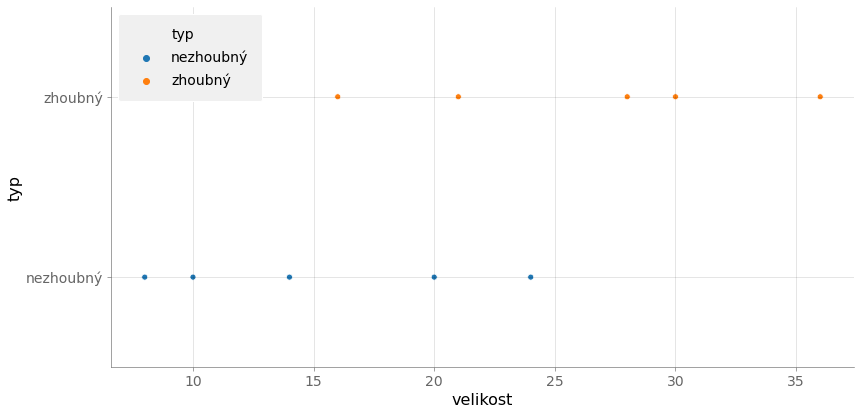

In [28]:
ax = sns.scatterplot('velikost', 'typ', data=df, hue='typ')
ax.set(ylim=(-0.5, 1.5))

**Klasifikace** - lze použít logistickou regresi. Skoro jako lineární regrese, jen výsledná hodnota je nakonec transformována v pravděpodobnost pomocí logistické funkce - tzv. sigmoid.

In [29]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

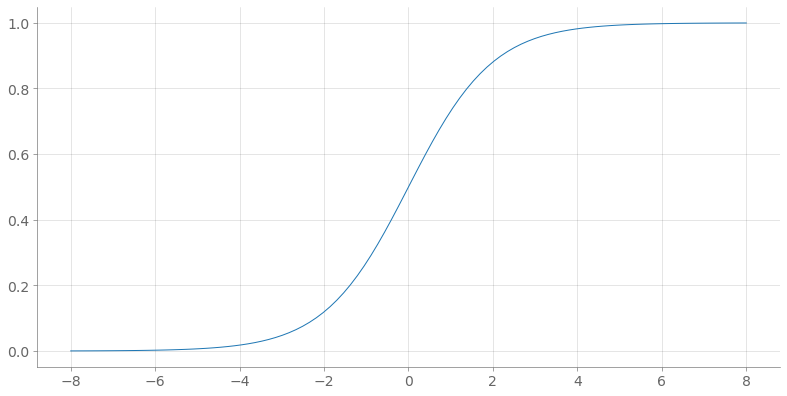

In [30]:
xs = np.linspace(-8, 8, 100)
ys = sigmoid(xs)
sns.lineplot(xs, ys)

In [31]:
df['je_zhoubny'] = np.int_(df['typ'] == 'zhoubný')

In [32]:
df

,velikost,typ,je_zhoubny
0,8,nezhoubný,0
1,10,nezhoubný,0
2,14,nezhoubný,0
3,16,zhoubný,1
4,20,nezhoubný,0
5,21,zhoubný,1
6,24,nezhoubný,0
7,28,zhoubný,1
8,30,zhoubný,1
9,36,zhoubný,1


In [33]:
model = smf.logit(formula='je_zhoubny ~ velikost', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.442936
         Iterations 6


[(-0.5, 1.5)]

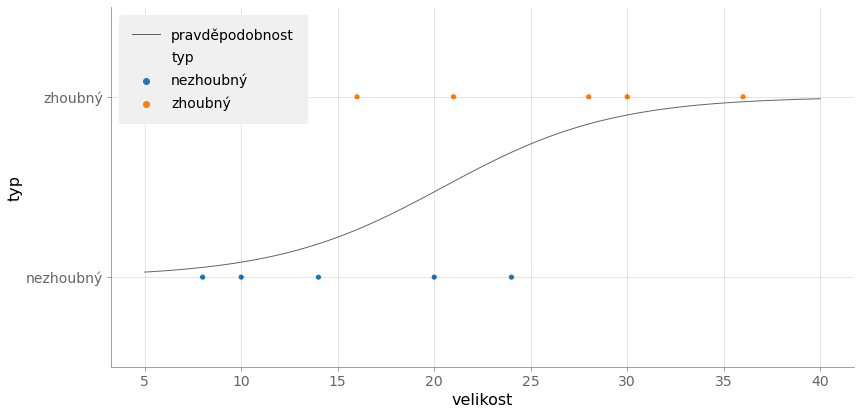

In [34]:
xs = np.linspace(5, 40, 100)
ys = sigmoid(model.params.Intercept + xs * model.params.velikost)

ax = sns.scatterplot('velikost', 'typ', data=df, hue='typ')
sns.lineplot(xs, ys, color='black', alpha=0.6, label='pravděpodobnost')
ax.set(ylim=(-0.5, 1.5))

In [35]:
sigmoid(model.params.Intercept + 20 * model.params.velikost)

0.47272899674957347

Se sigmoidem se během tohoto týdne setkáme ještě několikrát. Příbuznou funkcí je také hyperbolický tangent, tanh, který je pouze sigmoid roztažený na výšku na interval (-1, 1) a naopak smrštěný na polovinu v horizontálním směru.

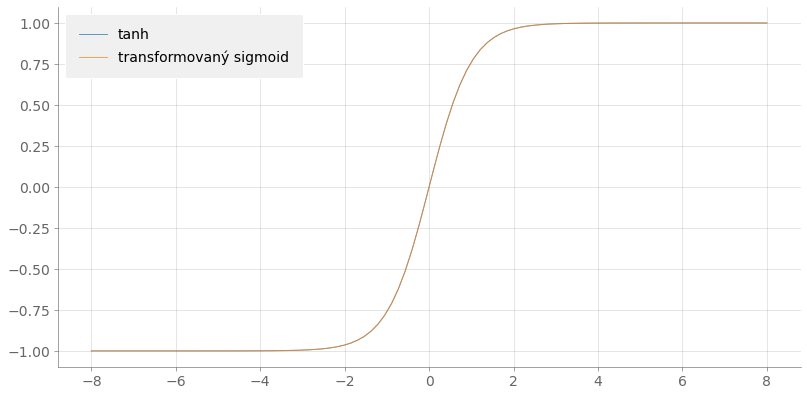

In [36]:
xs = np.linspace(-8, 8, 100)
ys = np.tanh(xs)
sns.lineplot(xs, ys, label='tanh', alpha=0.7)
sns.lineplot(xs, 2 * sigmoid(2 * xs) - 1, label='transformovaný sigmoid', alpha=0.7)

## V. Pro trpělivé

In [ ]:
df = pd.read_csv('data/V_pro_trpelive.csv')

In [ ]:
df

In [ ]:
sns.scatterplot('a', 'b', data=df)

Tento příklad je ukázkou učení bez supervize. Máme data, která nemají žádné "správné odpovědi", snažíme se pouze uhodnout něco o možné struktuře dat.

Zadání se ptá na rozdělení dat do nějakých skupin - toto je příkladem klustrování, kdy hledáme shluky (klustry) podobných pozorování. Nejjednodušší je například sdružit dohromady data, která jsou k sobě blízko. Klasickou klustrovací metodou je k-means, která by však na těchto datech nefungovala příliš dobře.

Spektrální klustrování posuzuje vzdálenosti jednotlivých bodů od sebe a následně se snaží sdružit "blízké" body k sobě.

In [ ]:
from sklearn.cluster import SpectralClustering

In [ ]:
n_clusters = 3
clustering = SpectralClustering(n_clusters=n_clusters).fit(df.values)
sns.scatterplot('a', 'b', data=df, hue=[f'c_{l}' for l in clustering.labels_])

Různý počet vyžadovaných klusterů vede k odlišným řešením. Rovněž použití jiných klustrovacích algoritmů by dalo jiná řešení a zpravidla nelze posoudit, která jsou lepší či horší.

## VI. Mzdy

In [ ]:
df = pd.read_csv('data/VI_mzdy.csv')

In [ ]:
df

In [ ]:
fig, ax = plt.subplots(1, 2)
sns.scatterplot('zkusenost', 'mzda', data=df, ax=ax[0])
sns.scatterplot('vzdelani', 'mzda', data=df, ax=ax[1])

In [ ]:
model = smf.ols(formula='mzda ~ zkusenost + vzdelani + gender', data=df).fit()
zena_coef = model.params['gender[T.žena]']
print(f'Regresní model: mzda = {model.params.Intercept:.1f} + {model.params.zkusenost:.1f} * zkusenost + ' \
      f'{model.params.vzdelani:.1f} * vzdelani + {zena_coef:.1f} * žena')

In [ ]:
avg_vzdelani = df['vzdelani'].mean()
avg_zkusenost = df['zkusenost'].mean()

In [ ]:
fig, ax = plt.subplots(1, 2)
sns.scatterplot('zkusenost', 'mzda', data=df, ax=ax[0])
abline(model.params.zkusenost, model.params.Intercept + avg_vzdelani * model.params.vzdelani + 0.5 * zena_coef, ax=ax[0])
sns.scatterplot('vzdelani', 'mzda', data=df, ax=ax[1])
abline(model.params.vzdelani, model.params.Intercept + avg_zkusenost * model.params.zkusenost + 0.5 * zena_coef, ax=ax[1])